This Notebook mainly performs Exploratory Data Analysis on the Credit Card Dataset.

Firstly, let's import all the the required libraries and modules

In [1]:
from src.Preprocessing import load_data, preprocess_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Lets load the data and take a look at it.

In [2]:
file_path = 'Dataset/creditcard.csv'
data = load_data(file_path)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.isnull().sum().max()

0

Thankfully, there is no missing data. We got lucky.

Let's see the class distribution of our dataset.

In [5]:
print('Genuine transactions are', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fraud transactions are', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Genuine transactions are 99.83 % of the dataset
Fraud transactions are 0.17 % of the dataset


This is a very highly skewed dataset, but this is what we expected so no worries.

C:\Users\PMLS\AppData\Local\Temp\ipykernel_16880\1783704158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: Genuine || 1: Fraud)')

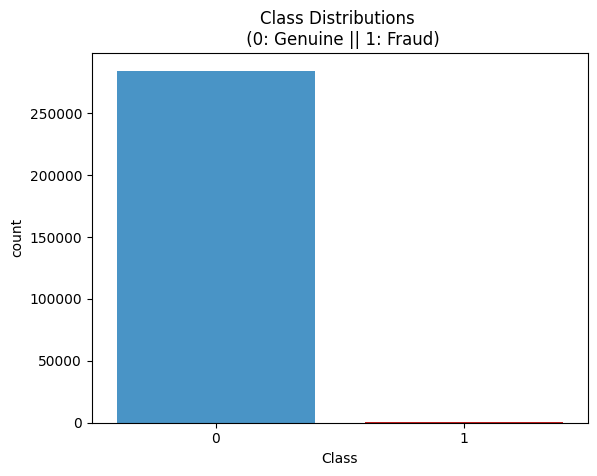

In [6]:
colors = ["#3498db", "#DF0101"]

sns.countplot(x='Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: Genuine || 1: Fraud)', fontsize=12)

As there are columns for the transaction time and amount, maybe that can tell us something insightful

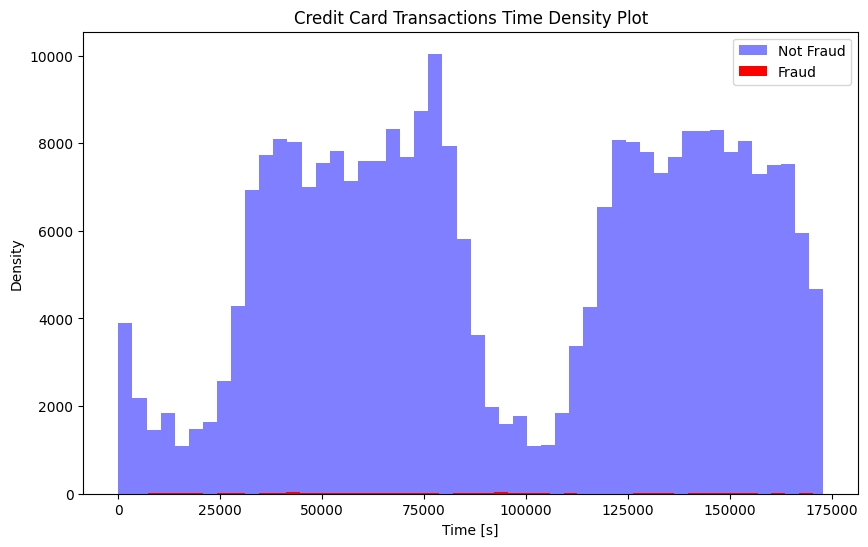

In [7]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

plt.figure(figsize=(10, 6))

plt.hist(class_0, bins=50, alpha=0.5, label='Not Fraud', color='blue')
plt.hist(class_1, bins=50, alpha=1, label='Fraud', color='red')

plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


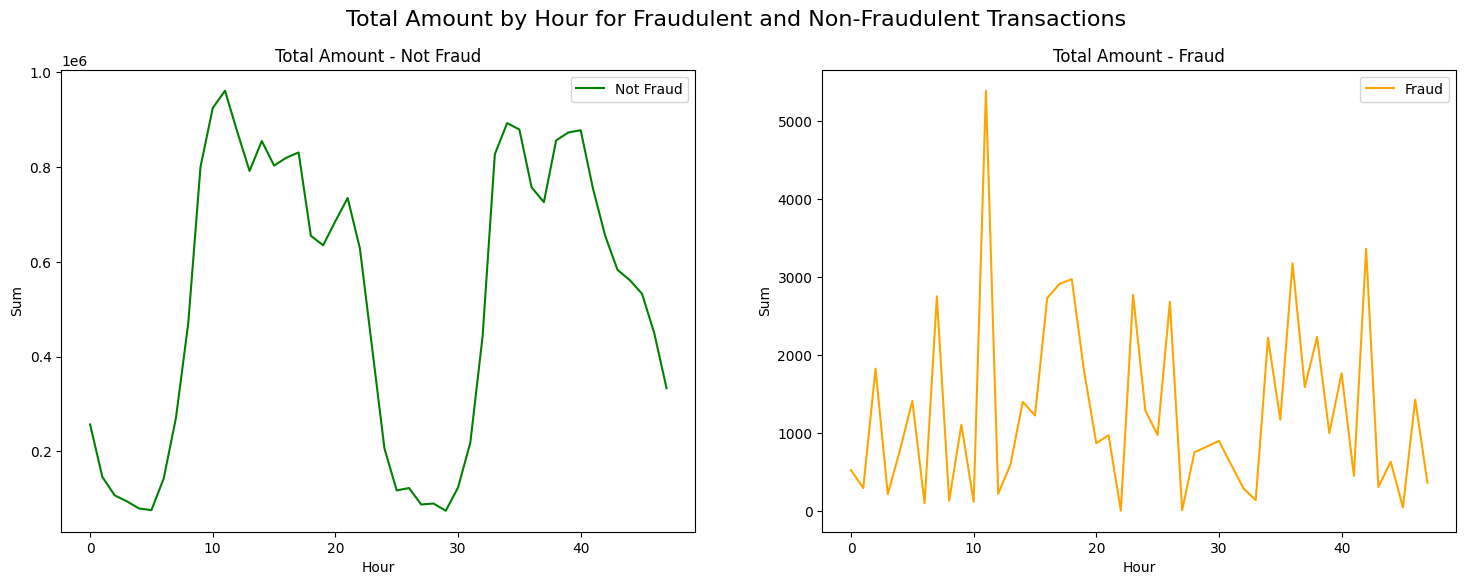

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.lineplot(x="Hour", y="Sum", data=df.loc[df.Class == 0], ax=ax1, label='Not Fraud', color='green')
sns.lineplot(x="Hour", y="Sum", data=df.loc[df.Class == 1], ax=ax2, label='Fraud', color='orange')

ax1.set_title('Total Amount - Not Fraud')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Sum')
ax1.legend()

ax2.set_title('Total Amount - Fraud')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Sum')
ax2.legend()

plt.suptitle("Total Amount by Hour for Fraudulent and Non-Fraudulent Transactions", fontsize=16)
plt.show()

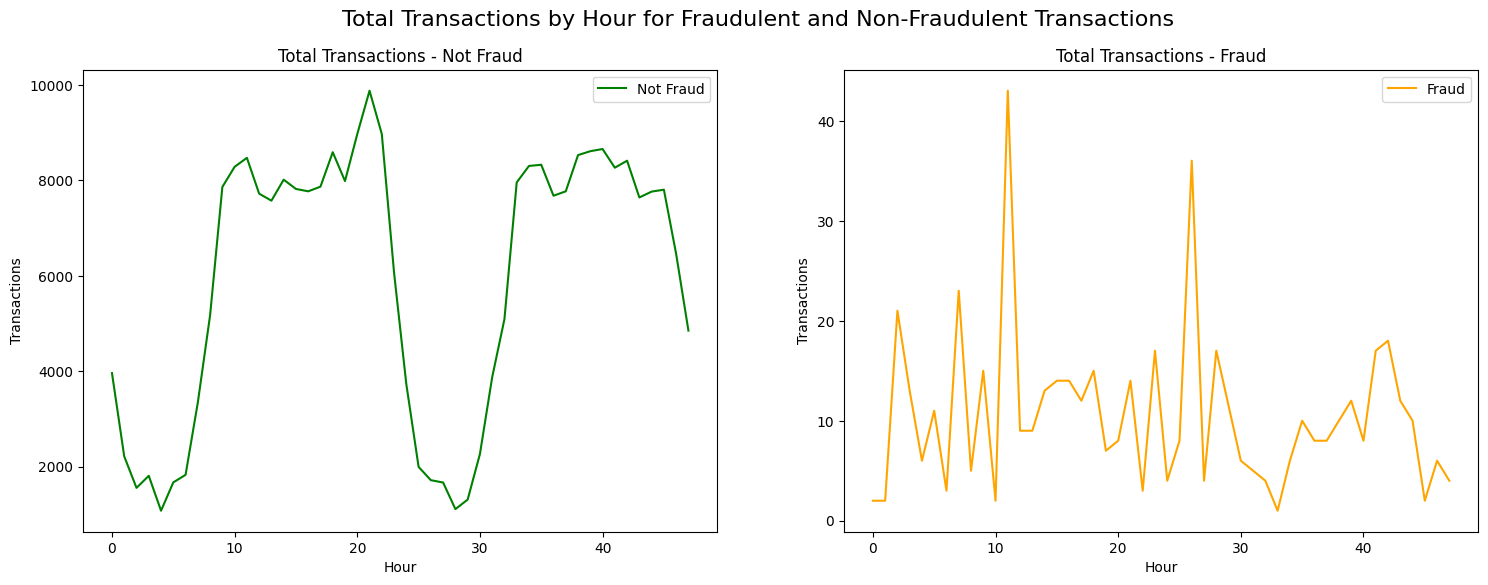

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.lineplot(x="Hour", y="Transactions", data=df.loc[df.Class == 0], ax=ax1, label='Not Fraud', color='green')
sns.lineplot(x="Hour", y="Transactions", data=df.loc[df.Class == 1], ax=ax2, label='Fraud', color='orange')

ax1.set_title('Total Transactions - Not Fraud')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Transactions')
ax1.legend()

ax2.set_title('Total Transactions - Fraud')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Transactions')
ax2.legend()

plt.suptitle("Total Transactions by Hour for Fraudulent and Non-Fraudulent Transactions", fontsize=16)
plt.show()

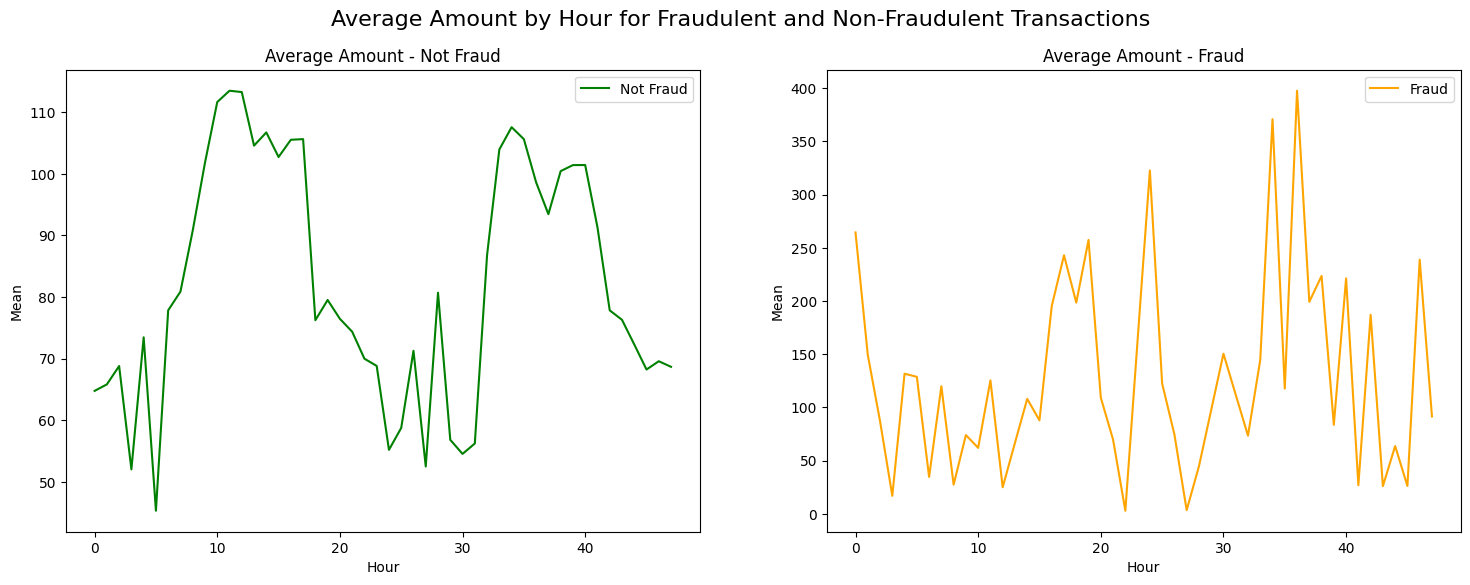

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

sns.lineplot(x="Hour", y="Mean", data=df.loc[df.Class == 0], ax=ax1, label='Not Fraud', color='green')
sns.lineplot(x="Hour", y="Mean", data=df.loc[df.Class == 1], ax=ax2, label='Fraud', color='orange')

ax1.set_title('Average Amount - Not Fraud')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean')
ax1.legend()

ax2.set_title('Average Amount - Fraud')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Mean')
ax2.legend()

plt.suptitle("Average Amount by Hour for Fraudulent and Non-Fraudulent Transactions", fontsize=16)
plt.show()

We saw the relatiionship of Time with the transactions.

Now, let's see how the transaction amount is related to these transactions.

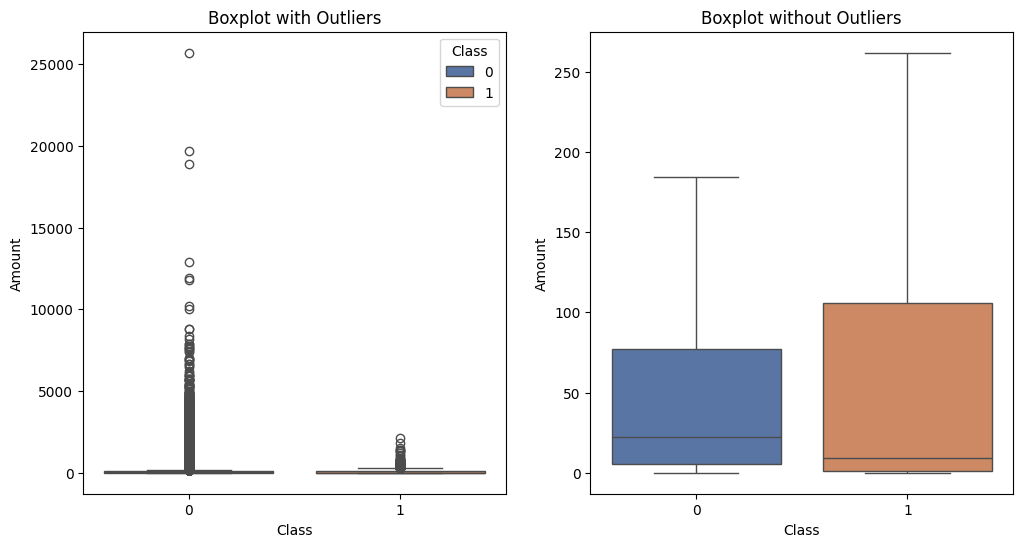

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Boxplot with outliers
sns.boxplot(x="Class", y="Amount", hue="Class", data=data, palette="deep", showfliers=True, ax=ax1)
ax1.set_title('Boxplot with Outliers')
ax1.set_xlabel('Class')
ax1.set_ylabel('Amount')
ax1.legend(title='Class', loc='upper right')

# Boxplot without outliers
sns.boxplot(x="Class", y="Amount", hue="Class", data=data, palette="deep", showfliers=False, ax=ax2)
ax2.set_title('Boxplot without Outliers')
ax2.set_xlabel('Class')
ax2.set_ylabel('Amount')
ax2.legend().set_visible(False)

plt.show()

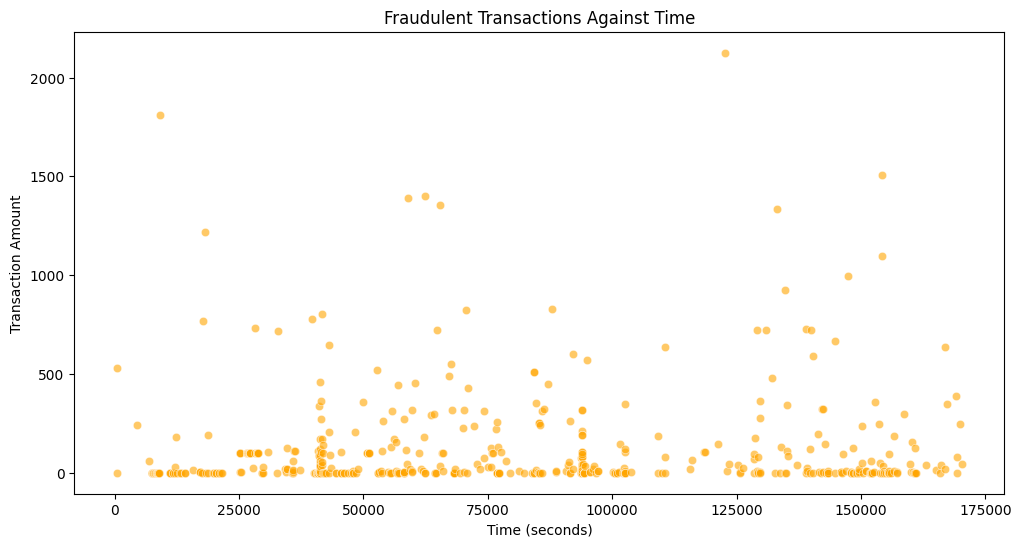

In [13]:
fraudulent_data = data[data['Class'] == 1]

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', data=fraudulent_data, color='orange', alpha=0.6)
plt.title('Fraudulent Transactions Against Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

In [14]:
class_0_stats = data.loc[data['Class'] == 0]['Amount'].describe()
class_1_stats = data.loc[data['Class'] == 1]['Amount'].describe()

print("Class 0 Statistics:")
print(class_0_stats)

print("\nClass 1 Statistics:")
print(class_1_stats)

Class 0 Statistics:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Class 1 Statistics:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Now, let's find out the correlation between different variables of the dataset.

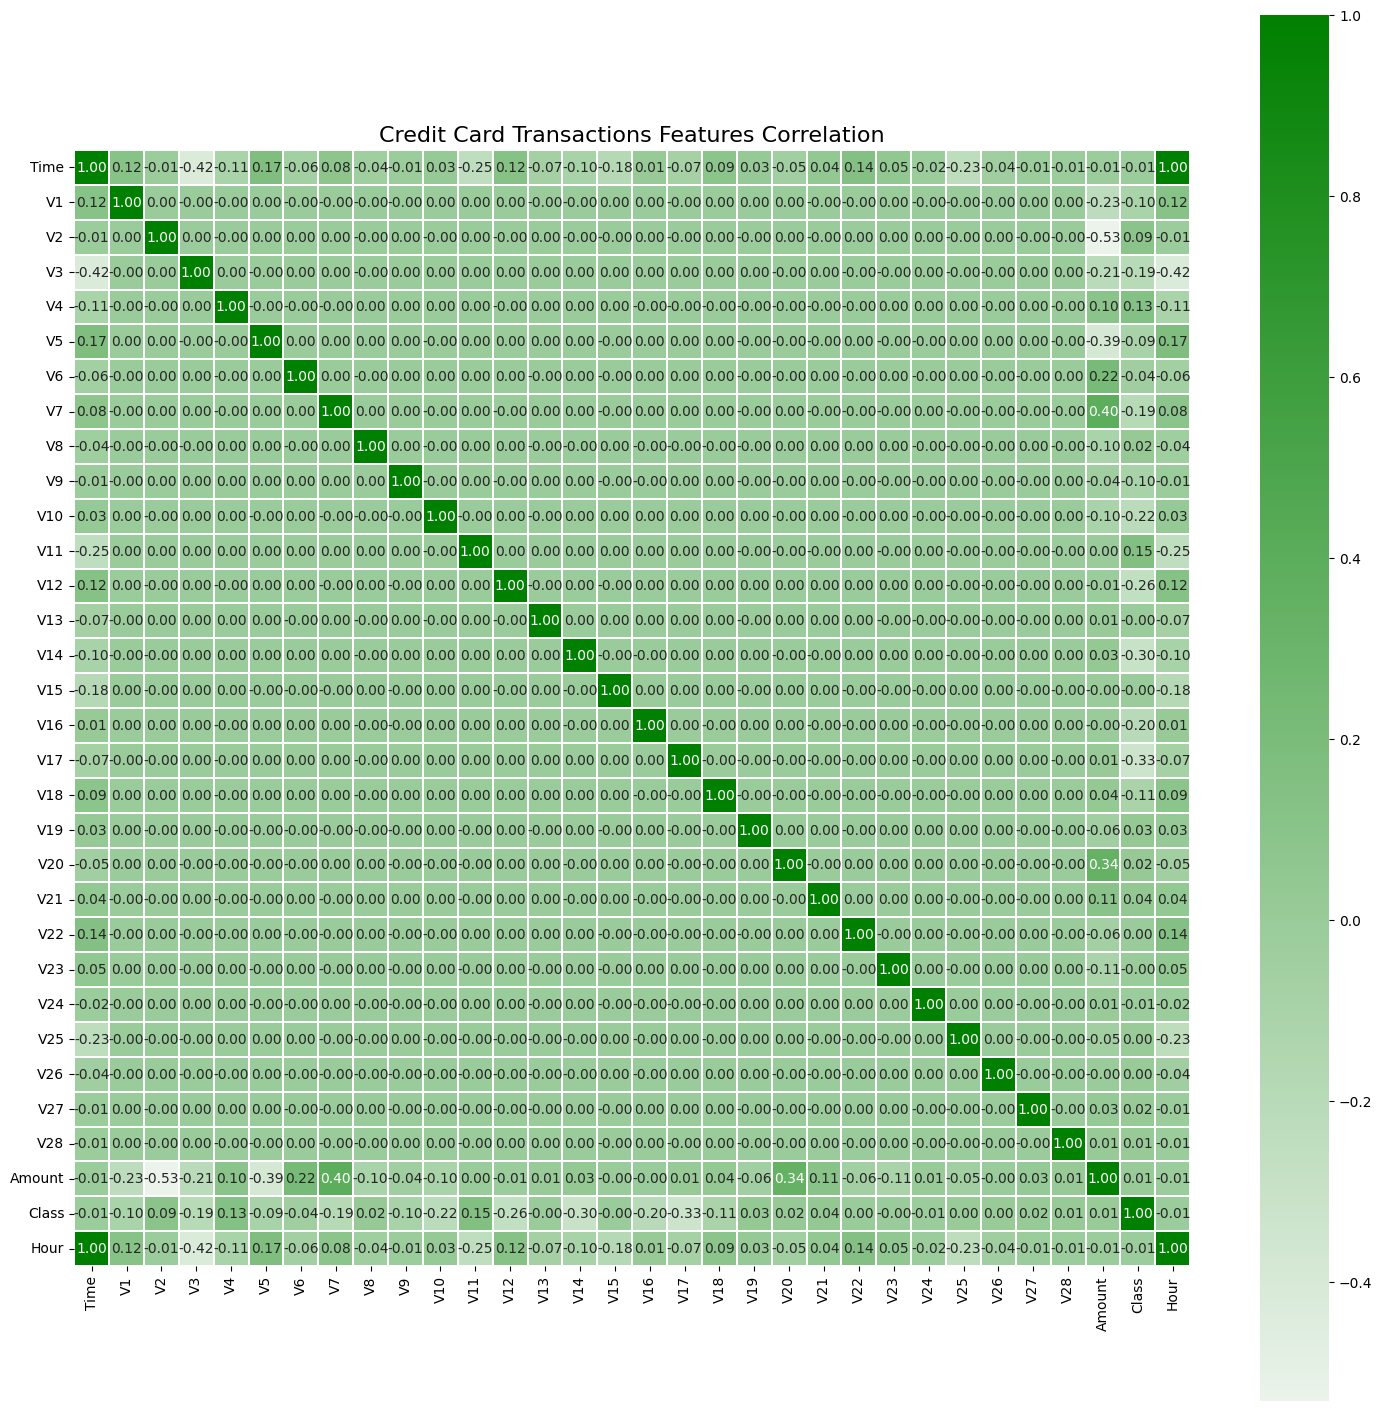

In [15]:
plt.figure(figsize=(18, 18))
plt.title('Credit Card Transactions Features Correlation', fontsize=16)
corr = data.corr()
cmap = sns.light_palette("green", as_cmap=True)

sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, linewidths=0.05, linecolor='white', square=True)
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_16880\1363759754.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data.loc[data['Class'] == 0, feature], label="Class = 0", ax=axes[i])
C:\Users\PMLS\AppData\Local\Temp\ipykernel_16880\1363759754.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data.loc[data['Class'] == 1, feature], label="Class = 1", ax=axes[i])


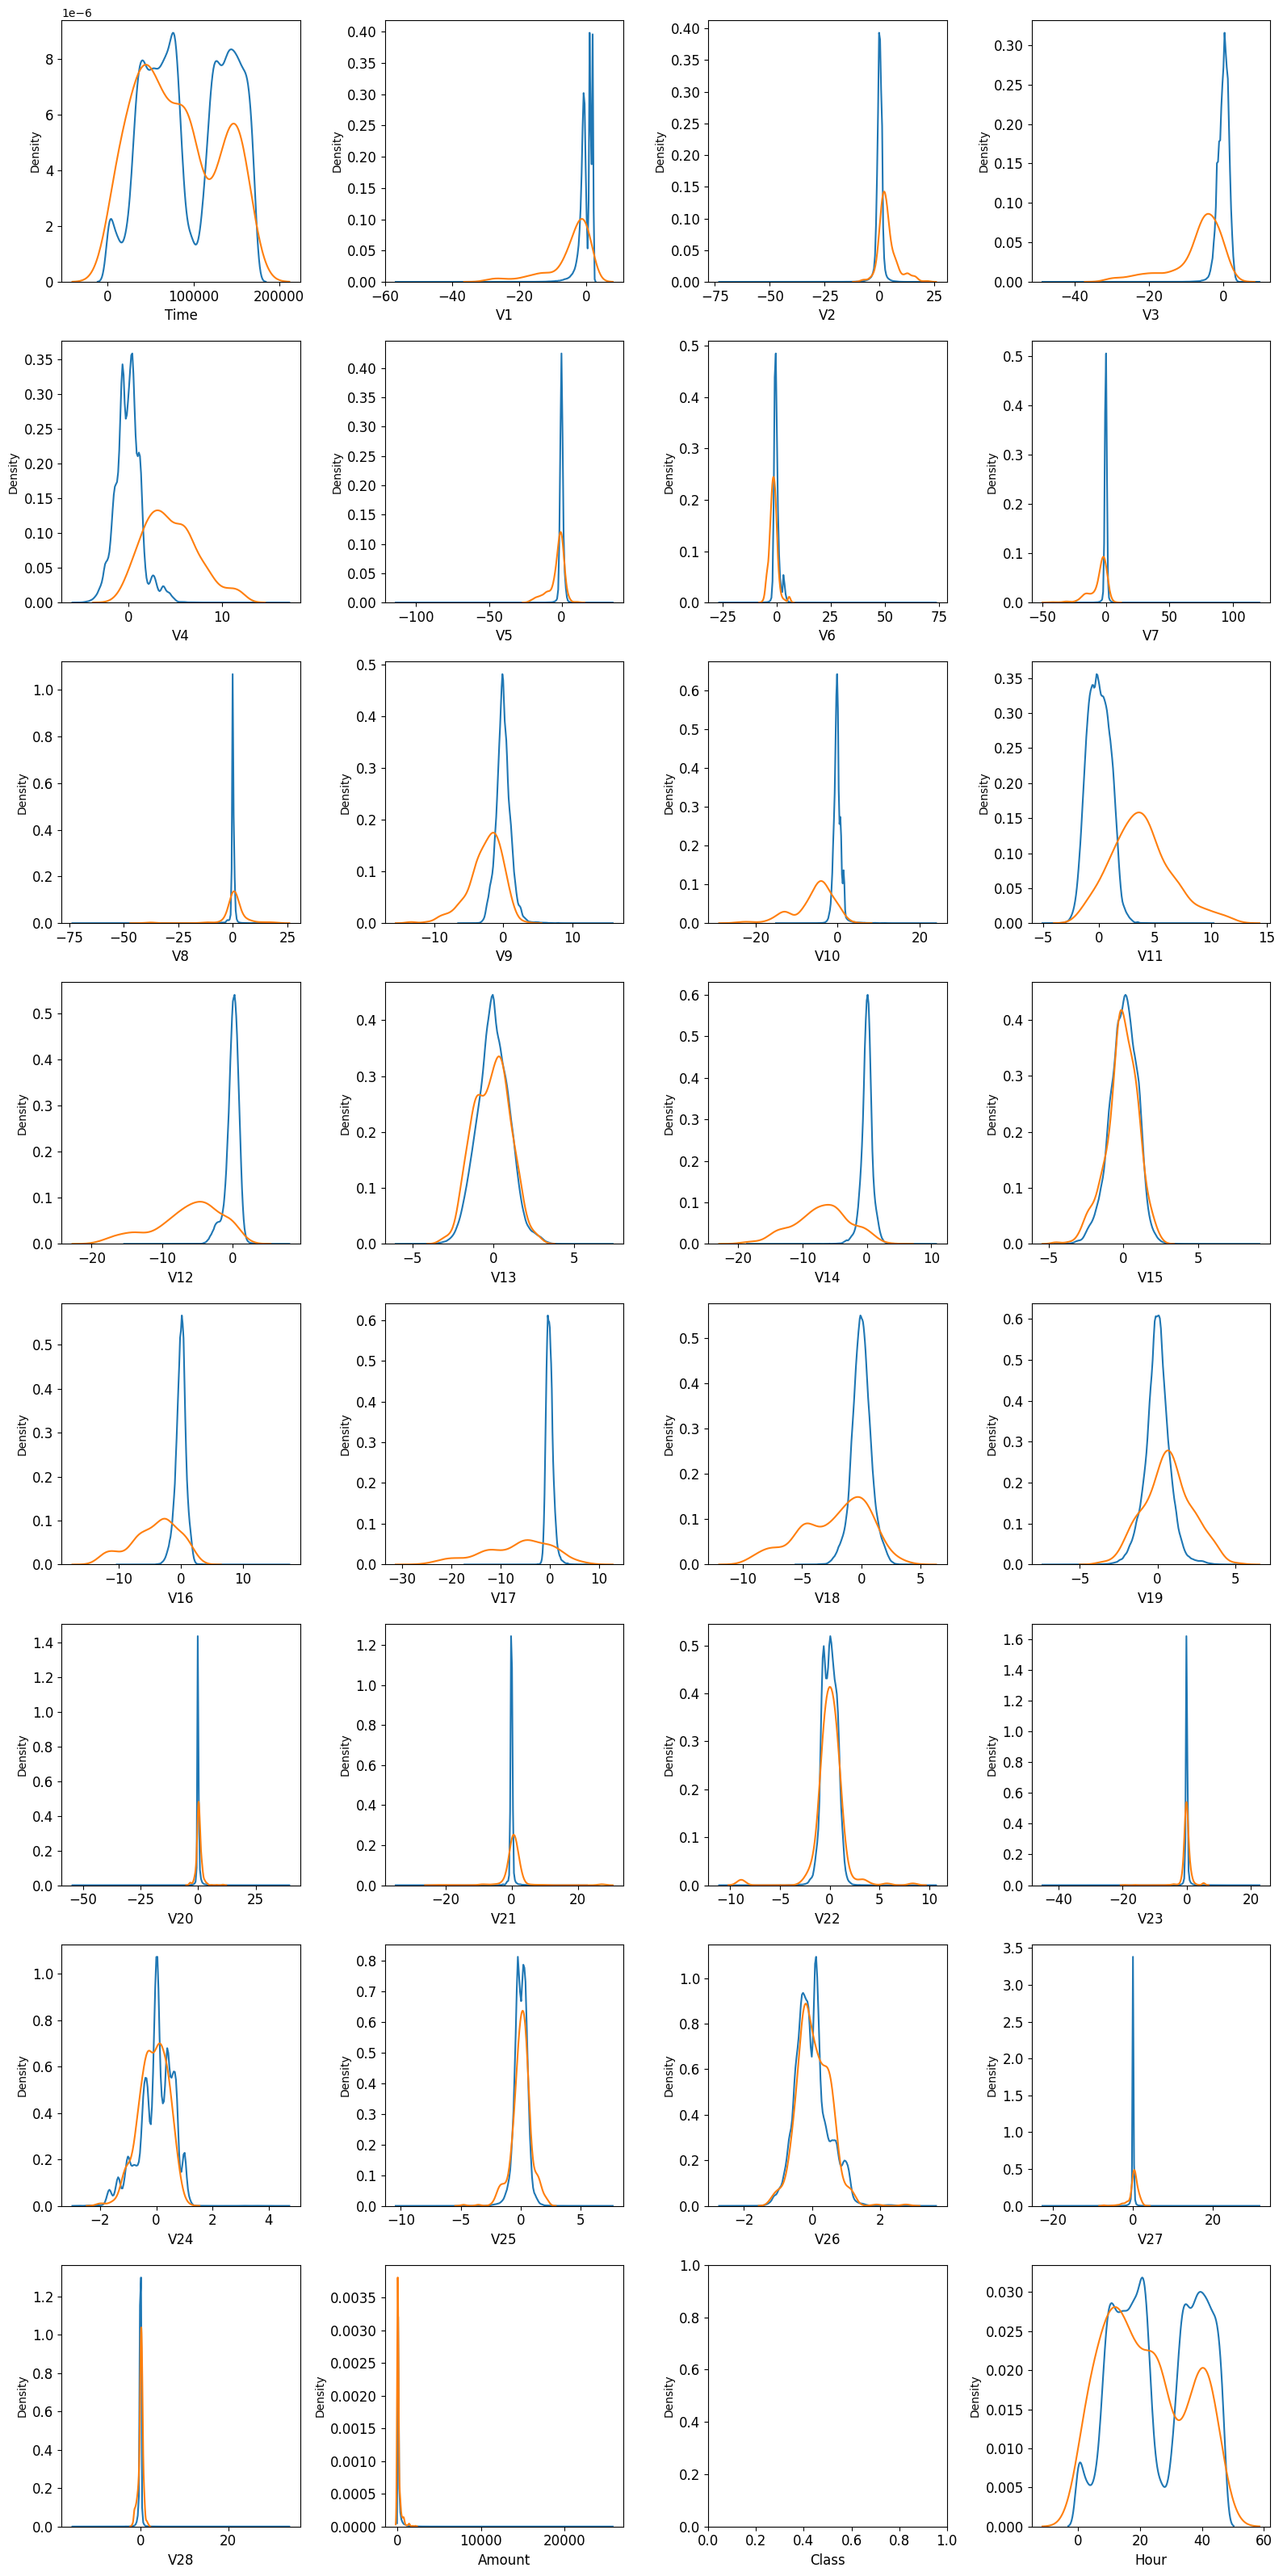

In [16]:
features = data.columns.values

# Set the number of columns and rows for subplots
n_cols = 4
n_rows = (len(features) - 1) // n_cols + 1

# Set the figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over features
for i, feature in enumerate(features):
    # Create subplots
    sns.kdeplot(data.loc[data['Class'] == 0, feature], label="Class = 0", ax=axes[i])
    sns.kdeplot(data.loc[data['Class'] == 1, feature], label="Class = 1", ax=axes[i])
    
    # Set labels and tick parameters
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()